# Gender Recognition

Dataset contains 27,167 '.jpg' files which 17 678 of them are photos of men faces and 9 489 are woman photos. Each file is renamed accordingly to it's category E.g. woman0, woman1, woman_2 etc.

![IMG](https://github.com/Hrushi11/Gender-Recognition/blob/main/images/man_woman.jpg?raw=true)


In [ ]:
# GPU Check
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4e4713a7-8ff5-829a-b63d-40e0fbdf50b9)


## Downloading the data

In [ ]:
# Getting the data
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d maciejgronczynski/biggest-genderface-recognition-dataset

 96% 423M/439M [00:04<00:00, 72.7MB/s]
100% 439M/439M [00:04<00:00, 95.3MB/s]


In [ ]:
# downloading helper_functions.py
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2021-08-15 06:33:51--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2021-08-15 06:33:51 (100 MB/s) - ‘helper_functions.py’ saved [10139/10139]



## Importing dependancies

In [ ]:
# Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import walk_through_dir, unzip_data, plot_loss_curves, compare_historys, make_confusion_matrix

### Unzipping and exploring the data

In [ ]:
# Unzipping the data
unzip_data("/content/biggest-genderface-recognition-dataset.zip")

In [ ]:
# Walkthrough our dataset
walk_through_dir("/content/faces")

There are 2 directories and 0 images in '/content/faces'.
There are 0 directories and 9489 images in '/content/faces/woman'.
There are 0 directories and 17678 images in '/content/faces/man'.


In [ ]:
# listing all the files in an array
men_arr = []
women_arr = []

# Getting all the men images in an array
for elem in os.listdir("/content/faces/man"):
  path = "/content/faces/man/" + elem
  men_arr.append(path)

# Getting all the wommen images in an array
for elem in os.listdir("/content/faces/woman"):
  path = "/content/faces/woman/" + elem
  women_arr.append(path)

In [ ]:
len(men_arr), len(women_arr)

(17678, 9489)

### Preprocess the images

In [ ]:
# Function to preprocess an image
IMG_SIZE = (224, 224)

def load_and_prep(filepath):
  img = tf.io.read_file(filepath)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, IMG_SIZE)

  return img

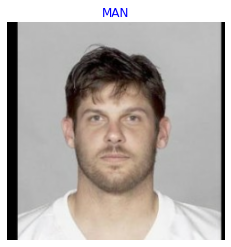

In [ ]:
# Randomly visualizing an image from men array
filepath = random.choice(men_arr)
img = load_and_prep(filepath)
plt.imshow(img / 255)
plt.title("MAN", color="blue")
plt.axis(False);

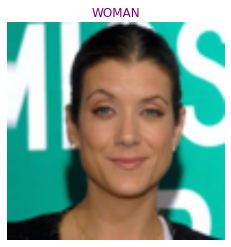

In [ ]:
# Randomly visualizing an image from women arr
filepath = random.choice(women_arr)
img = load_and_prep(filepath)
plt.imshow(img / 255)
plt.title("WOMAN", color="purple")
plt.axis(False);

## Randomly visualize multiple men

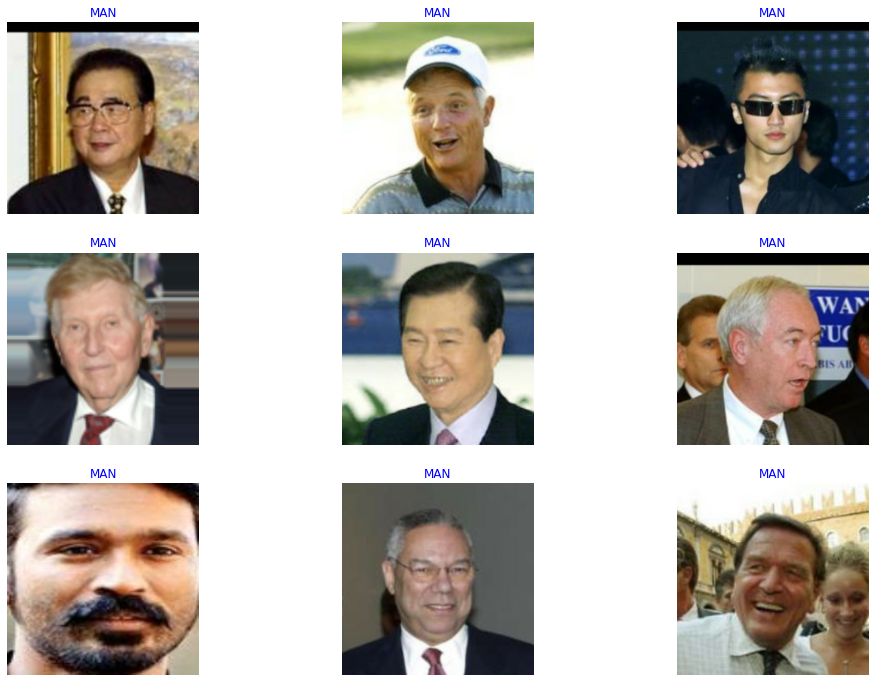

In [ ]:
# Randomly visualizing multiple images of males
plt.figure(figsize=(17, 12))
for i in range(9):
  filepath = random.choice(men_arr)
  img = load_and_prep(filepath)
  plt.subplot(3, 3, i+1)
  plt.imshow(img / 255)
  plt.title("MAN", color="blue")
  plt.axis(False);

## Randomly visualize multiple women

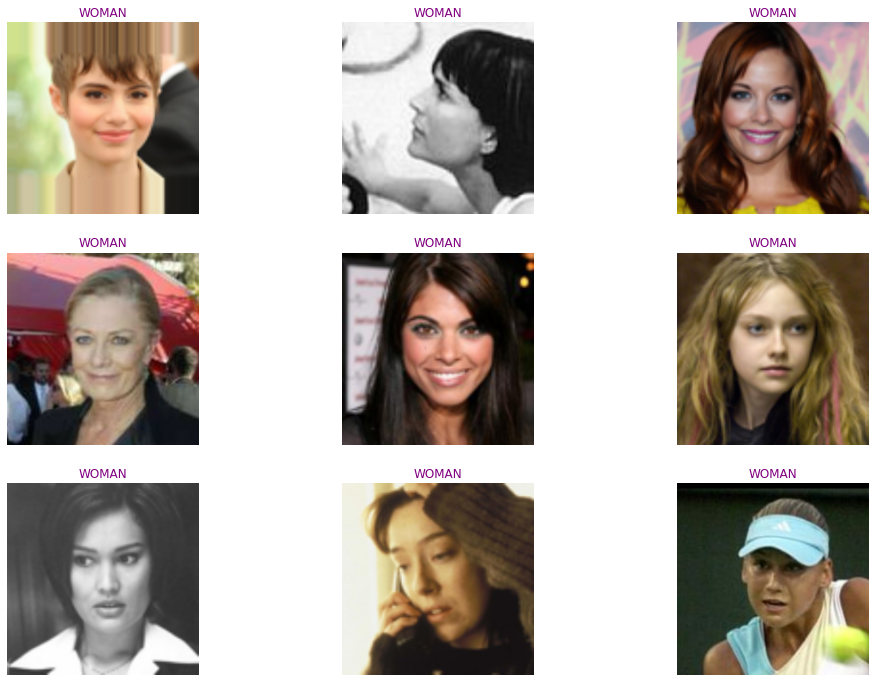

In [ ]:
# Randomly visualizing multiple images of females
plt.figure(figsize=(17, 12))
for i in range(9):
  filepath = random.choice(women_arr)
  img = load_and_prep(filepath)
  plt.subplot(3, 3, i+1)
  plt.imshow(img / 255)
  plt.title("WOMAN", color="purple")
  plt.axis(False);

## Randomly visualizing men and women

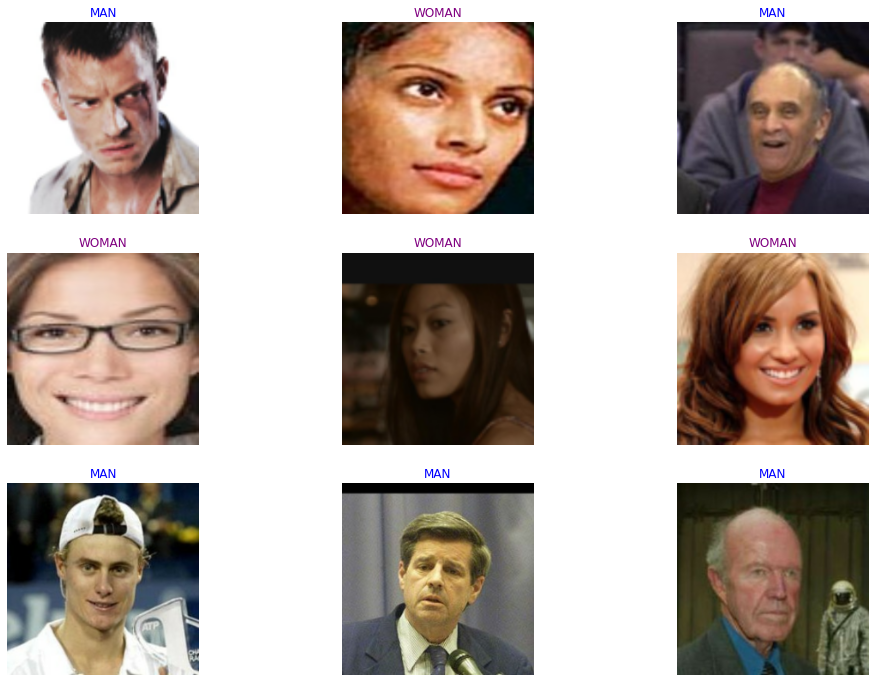

In [ ]:
# Randomly visualizing men and women
arr = [men_arr, women_arr]

# Plotting images of men and women
plt.figure(figsize=(17, 12))
for i in range(9):
  gender = random.choice(arr)
  filepath = random.choice(gender)
  img = load_and_prep(filepath)
  plt.subplot(3, 3, i+1)
  plt.imshow(img / 255)
  plt.axis(False)
  if filepath.split("/")[3] == 'woman':
    plt.title("WOMAN", color="purple")
  else :
    plt.title("MAN", color="blue")

## Data Augmentation layer

In [ ]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

### Visualizing augmented images

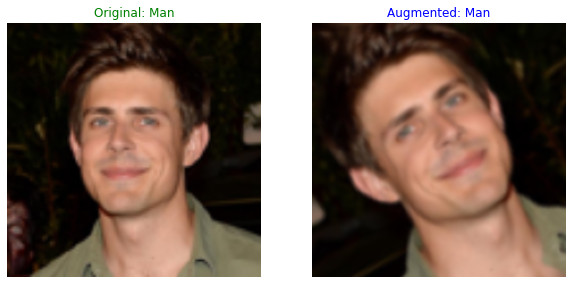

In [ ]:
# Visualizing augmentated image of a male with original image
filepath = random.choice(men_arr)
img = load_and_prep(filepath)
aug_img = data_augmentation(tf.expand_dims(img, axis=0))
aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

plt.figure(figsize=(10, 7))
# plot for original image
plt.subplot(1, 2, 1)
plt.axis(False)
plt.title("Original: Man", color="green")
plt.imshow(img / 255)

# plot for augmented image
plt.subplot(1, 2, 2)
plt.axis(False)
plt.title("Augmented: Man", color="blue")
plt.imshow(aug_img / 255);

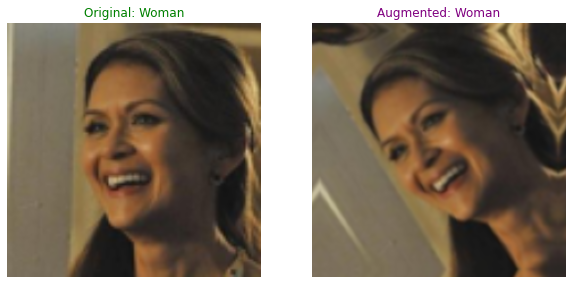

In [ ]:
# Visualizing augmentated image of a female with original image
filepath = random.choice(women_arr)
img = load_and_prep(filepath)
aug_img = data_augmentation(tf.expand_dims(img, axis=0))
aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

plt.figure(figsize=(10, 7))
# plot for original image
plt.subplot(1, 2, 1)
plt.axis(False)
plt.title("Original: Woman", color="green")
plt.imshow(img / 255)

# plot for augmented image
plt.subplot(1, 2, 2)
plt.axis(False)
plt.title("Augmented: Woman", color="purple")
plt.imshow(aug_img / 255);

### Visulaizing multiple male augmented images

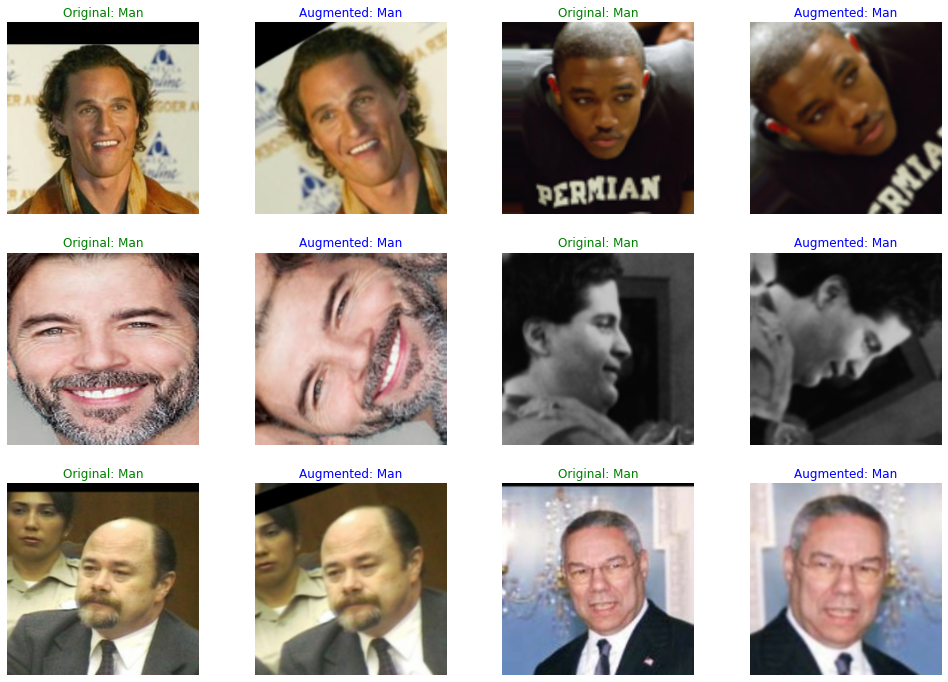

In [ ]:
# Visulaizing multiple male augmented images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  # Initializing the images
  filepath = random.choice(men_arr)
  img = load_and_prep(filepath)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

  # Plotting the original image
  plt.subplot(3, 4, i)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title("Original: Man", color="green")

  # Plotting the augmented image
  plt.subplot(3, 4, i+1)
  plt.imshow(aug_img/255)
  plt.axis(False)
  plt.title("Augmented: Man", color="blue");

### Visulaizing multiple female augmented images

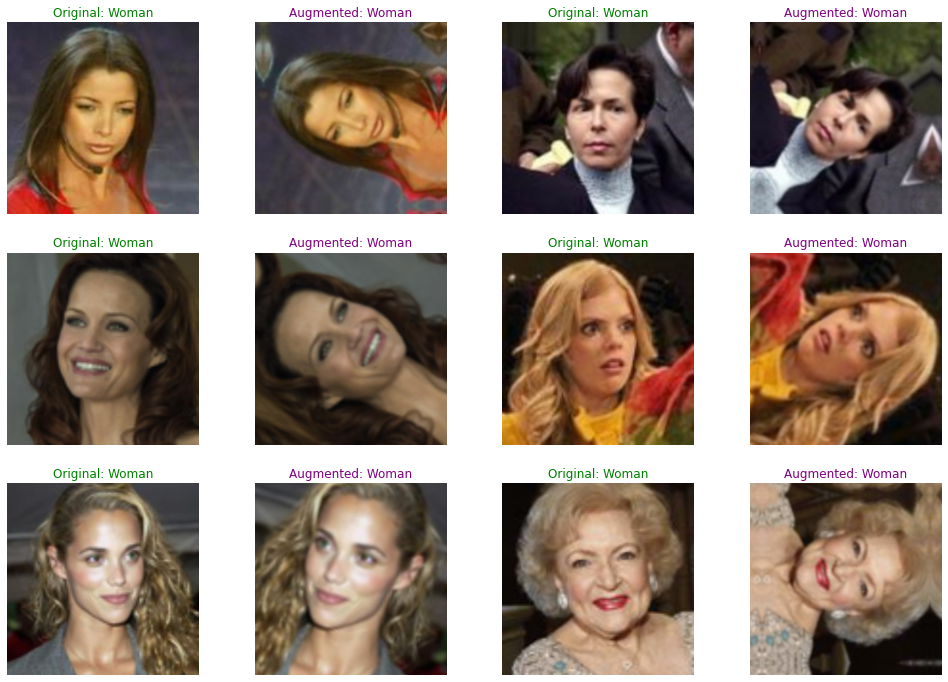

In [ ]:
# Visulaizing multiple female augmented images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  # Initializing the images
  filepath = random.choice(women_arr)
  img = load_and_prep(filepath)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

  # Plotting the original image
  plt.subplot(3, 4, i)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title("Original: Woman", color="green")

  # Plotting the augmented image
  plt.subplot(3, 4, i+1)
  plt.imshow(aug_img/255)
  plt.axis(False)
  plt.title("Augmented: Woman", color="purple");

### Visulaizing multiple male & female augmented images

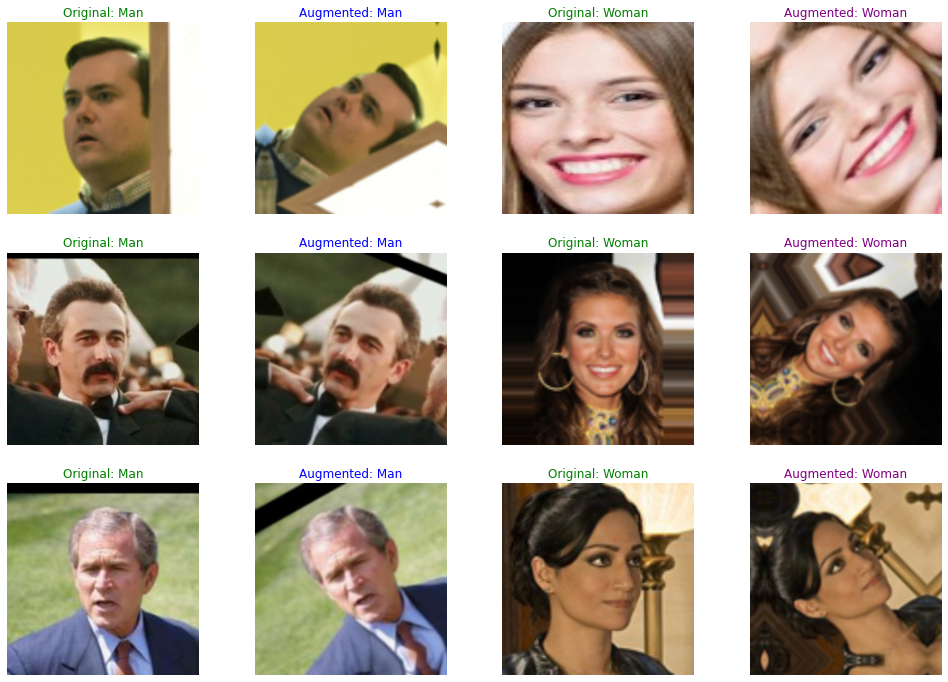

In [ ]:
# Visulaizing multiple male & female augmented images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  # Original male and female
  filepath_m = random.choice(men_arr)
  filepath_f = random.choice(women_arr)
  img_m = load_and_prep(filepath_m)
  img_f = load_and_prep(filepath_f)

  # Augmented male and female
  aug_img_m = data_augmentation(tf.expand_dims(img_m, axis=0))
  aug_img_f = data_augmentation(tf.expand_dims(img_f, axis=0))
  aug_img_m = tf.image.resize(aug_img_m[0], IMG_SIZE)
  aug_img_f = tf.image.resize(aug_img_f[0], IMG_SIZE)

  # Plotting male & female together
  if i in [1, 5, 9]:
    # Original image male
    plt.subplot(3, 4, i)
    plt.imshow(img_m/255)
    plt.axis(False)
    plt.title("Original: Man", color="green")

    # Augmented image male
    plt.subplot(3, 4, i+1)
    plt.imshow(aug_img_m/255)
    plt.axis(False)
    plt.title("Augmented: Man", color="blue")
  else:
    # Original image female
    plt.subplot(3, 4, i)
    plt.imshow(img_f/255)
    plt.axis(False)
    plt.title("Original: Woman", color="green")

    # Augmented image female
    plt.subplot(3, 4, i+1)
    plt.imshow(aug_img_f/255)
    plt.axis(False)
    plt.title("Augmented: Woman", color="purple")

## Getting our data ready

In [ ]:
len(men_arr), len(women_arr)

(17678, 9489)

### Balancing the data

In [ ]:
bal_arr = men_arr[:9489]
len(bal_arr), len(women_arr)

(9489, 9489)

### Merging the data

In [ ]:
bal_arr.extend(women_arr)
len(bal_arr)

18978

In [ ]:
bal_arr[18977]

'/content/faces/woman/woman_467.jpg'

In [ ]:
classes = []
for elem in bal_arr:
  classes.append(elem.split("/")[3])

In [ ]:
len(classes)

18978

In [ ]:
classes[18977]

'woman'

In [ ]:
df = pd.DataFrame({"filepath": bal_arr,
                   "label": classes})
len(df)

18978

## Train Test Split

In [ ]:
train_df, test_df = train_test_split(df,
                                     test_size=0.20, 
                                     random_state=42)

len(train_df), len(test_df)

(15182, 3796)

In [ ]:
train_df.head()

filepath  label
9411      /content/faces/man/man_13603.jpg    man
12922  /content/faces/woman/woman_5451.jpg  woman
14452  /content/faces/woman/woman_7382.jpg  woman
3601       /content/faces/man/man_3258.jpg    man
15018  /content/faces/woman/woman_6197.jpg  woman

In [ ]:
test_df.head()

filepath  label
2444      /content/faces/man/man_13975.jpg    man
15748  /content/faces/woman/woman_6216.jpg  woman
11223  /content/faces/woman/woman_4464.jpg  woman
4007       /content/faces/man/man_8030.jpg    man
4265      /content/faces/man/man_10607.jpg    man

## Data Generators

In [ ]:
train_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

In [ ]:
train_data = train_data_gen.flow_from_dataframe(train_df,
                                                x_col="filepath",
                                                y_col="label",
                                                target_size=IMG_SIZE,
                                                seed=42)

test_data = test_data_gen.flow_from_dataframe(test_df,
                                              x_col="filepath",
                                              y_col="label",
                                              target_size=IMG_SIZE,
                                              seed=42,
                                              shuffle=False)

Found 15182 validated image filenames belonging to 2 classes.
Found 3796 validated image filenames belonging to 2 classes.


In [ ]:
len(train_data), len(test_data)

(475, 119)

In [ ]:
train_data.class_indices

{'man': 0, 'woman': 1}

In [ ]:
class_names = ['man', 'woman']

## Building the Model

In [ ]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting input layer 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)

# compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data) * 0.3))

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/5
475/475 [==============================] - 150s 243ms/step - loss: 0.3183 - accuracy: 0.8577 - val_loss: 0.2650 - val_accuracy: 0.8857
Epoch 2/5
475/475 [==============================] - 85s 180ms/step - loss: 0.2767 - accuracy: 0.8806 - val_loss: 0.2602 - val_accuracy: 0.8911
Epoch 3/5
475/475 [==============================] - 75s 157ms/step - loss: 0.2665 - accuracy: 0.8887 - val_loss: 0.2534 - val_accuracy: 0.8884
Epoch 4/5
475/475 [==============================] - 67s 142ms/step - loss: 0.2572 - accuracy: 0.8934 - val_loss: 0.2528 - val_accuracy: 0.8866
Epoch 5/5
475/475 [==============================] - 60s 126ms/step - loss: 0.2453 - accuracy: 0.8980 - val_loss: 0.2457 - val_accuracy: 0.8955


In [ ]:
model_1.evaluate(test_data)

119/119 [==============================] - 9s 75ms/step - loss: 0.2452 - accuracy: 0.9002


[0.24520084261894226, 0.9001580476760864]

### Loss curves

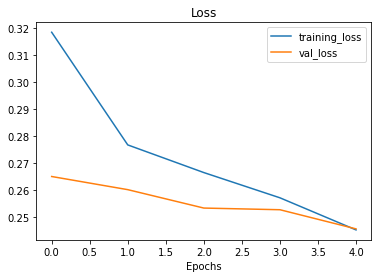

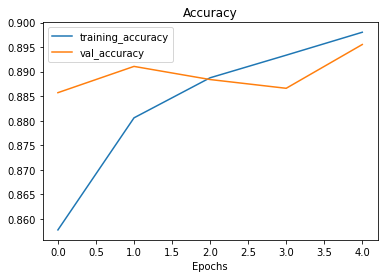

In [ ]:
plot_loss_curves(history_1)

### Fine tuning 

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

# Fine-tune for 5 more epochs
fine_tune_epochs = 10

history_1_fine_tune_1 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps= int(len(test_data) * 0.3), 
                                    initial_epoch=history_1.epoch[-1])

Epoch 5/10
475/475 [==============================] - 68s 129ms/step - loss: 0.2492 - accuracy: 0.8944 - val_loss: 0.2272 - val_accuracy: 0.9071
Epoch 6/10
475/475 [==============================] - 54s 113ms/step - loss: 0.2244 - accuracy: 0.9093 - val_loss: 0.2175 - val_accuracy: 0.9107
Epoch 7/10
475/475 [==============================] - 54s 114ms/step - loss: 0.2074 - accuracy: 0.9190 - val_loss: 0.2144 - val_accuracy: 0.9143
Epoch 8/10
475/475 [==============================] - 50s 106ms/step - loss: 0.1953 - accuracy: 0.9221 - val_loss: 0.2182 - val_accuracy: 0.9089
Epoch 9/10
475/475 [==============================] - 50s 105ms/step - loss: 0.1859 - accuracy: 0.9266 - val_loss: 0.2021 - val_accuracy: 0.9125
Epoch 10/10
475/475 [==============================] - 47s 99ms/step - loss: 0.1782 - accuracy: 0.9309 - val_loss: 0.2117 - val_accuracy: 0.9125


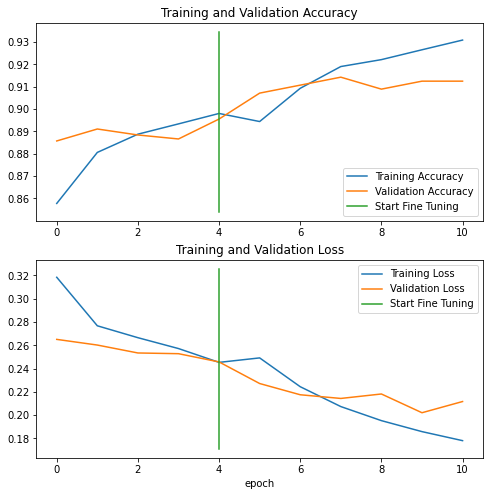

In [ ]:
compare_historys(history_1, history_1_fine_tune_1, 5)

### Evaluating final model

In [ ]:
model_1.evaluate(test_data)

119/119 [==============================] - 9s 71ms/step - loss: 0.2144 - accuracy: 0.9131


[0.21443642675876617, 0.9130663871765137]

### Saving the final model

In [ ]:
model_1.save("/content/drive/MyDrive/Gender-Recognition")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Gender-Recognition/assets


## Getting Insights of the model

In [ ]:
label_val = []
for elem in test_data.filepaths:
  for cl in range(2):
    if elem.split("/")[3] == class_names[cl]:
      label_val.append(cl)

In [ ]:
label_val[5:10]

[0, 0, 1, 0, 1]

### Prediction probabilities

In [ ]:
# Getting prediction probabilites
pred_prob = model_1.predict(test_data)
pred_prob

array([[9.8684919e-01, 1.3150812e-02],
       [2.2107443e-01, 7.7892560e-01],
       [3.9265296e-04, 9.9960738e-01],
       ...,
       [6.1518527e-05, 9.9993849e-01],
       [6.9046248e-04, 9.9930954e-01],
       [1.2768862e-02, 9.8723119e-01]], dtype=float32)

In [ ]:
y_pred = pred_prob.argmax(axis=1)
y_pred[:50]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1])

In [ ]:
y_true = np.array(label_val)
y_true[:50]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1])

## Confusion Matrix

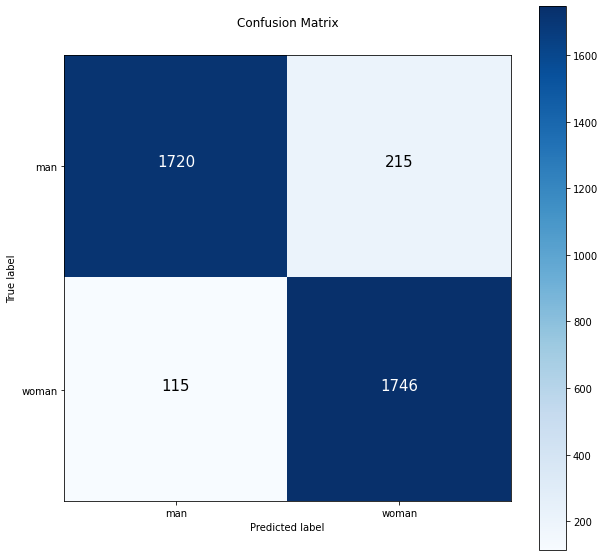

In [ ]:
make_confusion_matrix(y_true=y_true,
                      y_pred=y_pred,
                      classes=class_names,
                      norm=False)

## Classification report

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1935
           1       0.89      0.94      0.91      1861

    accuracy                           0.91      3796
   macro avg       0.91      0.91      0.91      3796
weighted avg       0.91      0.91      0.91      3796



In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_true, y_pred, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.9124668435013262,
  'precision': 0.9373297002724795,
  'recall': 0.8888888888888888,
  'support': 1935},
 '1': {'f1-score': 0.9136577708006279,
  'precision': 0.8903620601733809,
  'recall': 0.938205265986029,
  'support': 1861},
 'accuracy': 0.9130663856691253,
 'macro avg': {'f1-score': 0.9130623071509771,
  'precision': 0.9138458802229302,
  'recall': 0.913547077437459,
  'support': 3796},
 'weighted avg': {'f1-score': 0.9130506990608627,
  'precision': 0.9143036786116727,
  'recall': 0.9130663856691253,
  'support': 3796}}

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'man': 0.9124668435013262, 'woman': 0.9136577708006279}

In [ ]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

class_name  f1-score
1      woman  0.913658
0        man  0.912467

## F1 scores

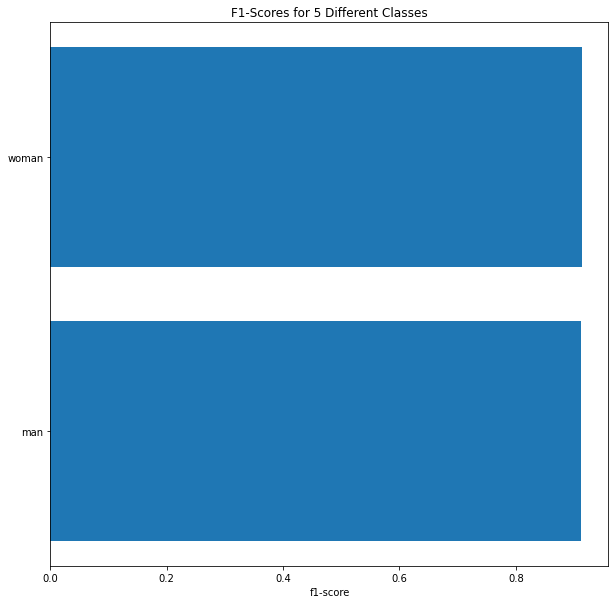

In [ ]:
# plotting F1 scores
fig, ax = plt.subplots(figsize=(10, 10))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 5 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(0.1*width, rect.get_y() + rect.get_height()/3,
            f"{width:.2f}",
            ha='center', va='bottom')

## Predictions of the model

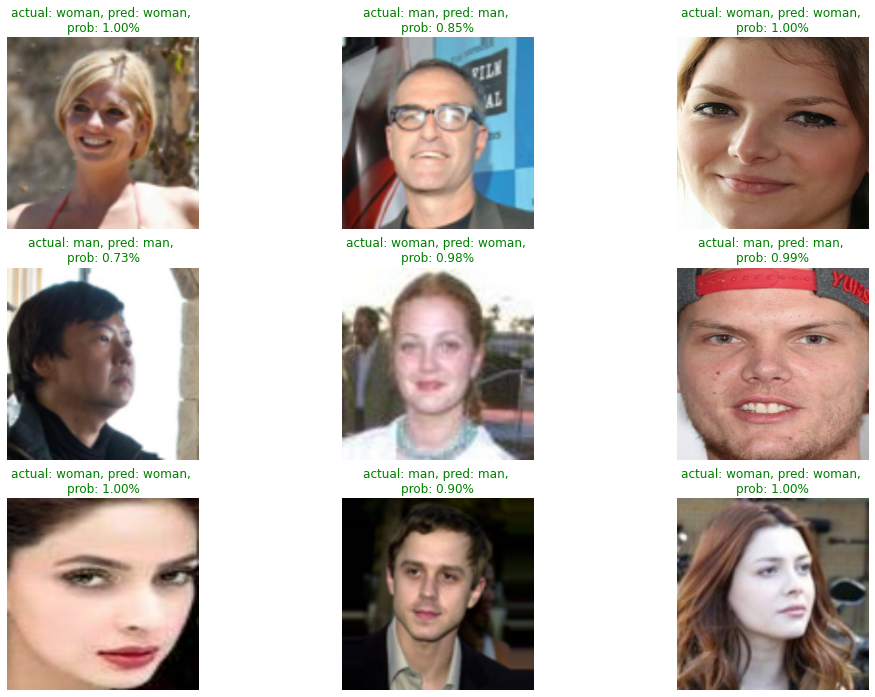

In [ ]:
plt.figure(figsize=(17, 12))
for i in range(9):
  # Choose a random image from a random class 
  filepath = random.choice(np.array(test_df["filepath"]))
  class_name = filepath.split("/")[3]

  # Load the image and make predictions
  img = load_and_prep(filepath) 
  pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(3, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, \nprob: {pred_prob.max():.2f}%", c=title_color)
  plt.axis(False);

In [ ]:
df_pred = pd.DataFrame({"filename" : np.array(test_df["filepath"]),
                         "label": np.array(test_df["label"]),
                         "label_val": label_val,
                         "pred": y_pred})

In [ ]:
df_pred.head()

filename  label  label_val  pred
0     /content/faces/man/man_13975.jpg    man          0     0
1  /content/faces/woman/woman_6216.jpg  woman          1     1
2  /content/faces/woman/woman_4464.jpg  woman          1     1
3      /content/faces/man/man_8030.jpg    man          0     0
4     /content/faces/man/man_10607.jpg    man          0     0

In [ ]:
pred_probs = model_1.predict(test_data)
pred_probs

array([[9.8684919e-01, 1.3150812e-02],
       [2.2107443e-01, 7.7892560e-01],
       [3.9265296e-04, 9.9960738e-01],
       ...,
       [6.1518527e-05, 9.9993849e-01],
       [6.9046248e-04, 9.9930954e-01],
       [1.2768862e-02, 9.8723119e-01]], dtype=float32)

In [ ]:
pred_df = pd.DataFrame({"img_path": np.array(test_df["filepath"]),
                        "y_true": y_true,
                        "y_pred": y_pred,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_true],
                        "y_pred_classname": [class_names[i] for i in y_pred]}) 
pred_df.head()

img_path  ...  y_pred_classname
0     /content/faces/man/man_13975.jpg  ...               man
1  /content/faces/woman/woman_6216.jpg  ...             woman
2  /content/faces/woman/woman_4464.jpg  ...             woman
3      /content/faces/man/man_8030.jpg  ...               man
4     /content/faces/man/man_10607.jpg  ...               man

[5 rows x 6 columns]

In [ ]:
# check for pred 
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  ...  y_pred_classname  pred_correct
0     /content/faces/man/man_13975.jpg       0  ...               man          True
1  /content/faces/woman/woman_6216.jpg       1  ...             woman          True
2  /content/faces/woman/woman_4464.jpg       1  ...             woman          True
3      /content/faces/man/man_8030.jpg       0  ...               man          True
4     /content/faces/man/man_10607.jpg       0  ...               man          True

[5 rows x 7 columns]

In [ ]:
# Get the top wrong examples
top_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)
top_wrong.head(20)

img_path  ...  pred_correct
2847  /content/faces/woman/woman_7019.jpg  ...         False
3391      /content/faces/man/man_3739.jpg  ...         False
3517      /content/faces/man/man_1573.jpg  ...         False
73        /content/faces/man/man_2848.jpg  ...         False
3689     /content/faces/man/man_11782.jpg  ...         False
845      /content/faces/man/man_15826.jpg  ...         False
1897  /content/faces/woman/woman_6964.jpg  ...         False
2389       /content/faces/man/man_556.jpg  ...         False
200       /content/faces/man/man_1236.jpg  ...         False
1324     /content/faces/man/man_12413.jpg  ...         False
2012       /content/faces/man/man_139.jpg  ...         False
1704      /content/faces/man/man_1540.jpg  ...         False
962      /content/faces/man/man_16932.jpg  ...         False
3016  /content/faces/woman/woman_3703.jpg  ...         False
1518      /content/faces/man/man_3498.jpg  ...         False
2614       /content/faces/man/man_613.jpg  ...         False
2956      /content/faces/man/man_1282.jpg  ...         False
516   /content/faces/woman/woman_5872.jpg  ...         False
3754      /content/faces/man/man_3006.jpg  ...         False
501      /content/faces/man/man_17107.jpg  ...         False

[20 rows x 7 columns]

In [ ]:
len(top_wrong)

330

In [ ]:
filepaths = np.array(top_wrong["img_path"])
true = np.array(top_wrong["y_true_classname"])
pred = np.array(top_wrong["y_pred_classname"])
prob = np.array(top_wrong["pred_conf"])

## Wrongly predicted images

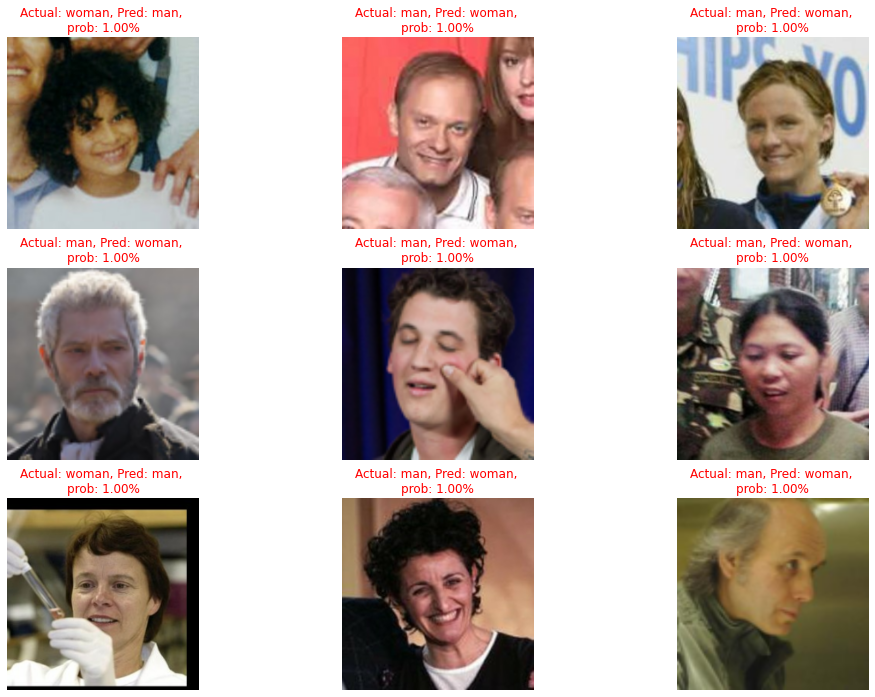

In [ ]:
# Plotting wrong predictions with insights
plt.figure(figsize=(17, 12))
for i in range(9):
  fpath = random.choice(filepaths)
  img = load_and_prep(fpath)
  plt.subplot(3, 3, i+1)
  plt.axis(False)
  plt.imshow(img / 255.)
  plt.title(f"Actual: {true[i]}, Pred: {pred[i]}, \nprob: {prob[i]:.2f}%", color="red");